# **Segundo conjunto de tareas a realizar**

## Paquetes necesarios e inicializaciones

Para la realización de las siguientes tareas, se va a utilizar el mismo *enviroment* de Python llamado VC_P1 creado en el [primer conjunto de tareas](../VC_P1/Exercises_P1.ipynb), la única dependencia adicional que se ha de descargar es la que viene dada por el paquete **Pillow**.

Adicionalmente, se va a cargar la [imagen](../VC_P2/Resources/mandril.jpg) a utilizar en las posteriores tareas, de forma que no sea necesario cargarla en cada uno de los ejercicios en donde se requiera su uso.

Adicionalmente, se van a inicializar todos los paquetes requeridos para la correcta ejecución de los ejercicios.

In [6]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

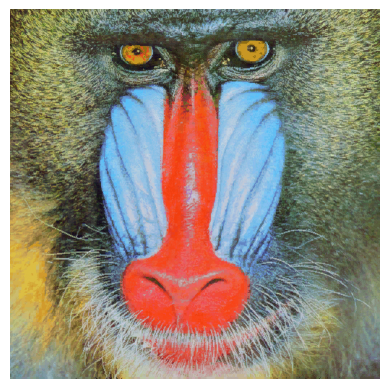

La imagen tiene un tamaño de 512x512 pixeles


In [7]:
#Lee imagen de archivo
image = cv2.imread('Resources/mandril.jpg') 

if image is not None:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.axis("off")
    plt.imshow(image_rgb) 
    plt.show()
    heigth, width = image.shape[:2]
    print(f'La imagen tiene un tamaño de {width}x{heigth} pixeles')
else: 
    print('Imagen no encontrada')

Para las tareas también va a ser de gran utilidad poseer la imagen en escala de grises, por lo tanto, se va a obtener la misma.

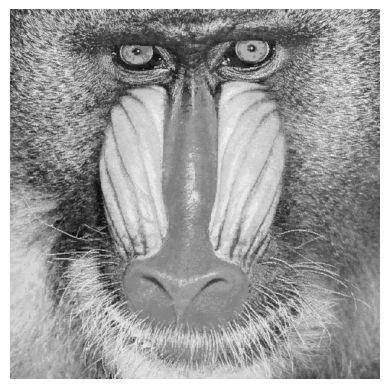

In [8]:
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.axis("off")
plt.imshow(gray_img, cmap='gray') 
plt.show()

## Número máximo de píxeles blancos

TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.90*maxfil.

## Umbralizado de imagen a 8 bits

Se va a aplicar un umbralizado de la imagen del [mandril](../VC_P2/Resources/mandril.jpg) tras pasarla a escala de grises y posteriormente, se va a realizar el conteo por filas y columnas. Adicionalmente, se va a mostrar el dato del valor máximo de las filas y columnas, además de determinar las mismas que tengan un valor por encima del 90% del máximo.

Por último, se usa la imagen del [mandril](../VC_P2/Resources/mandril.jpg) para mostrar las filas y columnas obtenidas tras realizar lo anterior mencionado usando la técnica de **[Sobel](https://scispace.com/pdf/edge-detection-by-modified-otsu-method-167ccq2st7.pdf)** y la técnica de **[Canny](https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html)**.

La técnica del **[Sobel](https://scispace.com/pdf/edge-detection-by-modified-otsu-method-167ccq2st7.pdf)** consiste en detectar bordes más continuos y gruesos ya que calcula la magnitud del gradiente en todas las partes, a esto se le aplica el umbral **[Otsu](https://learnopencv.com/otsu-thresholding-with-opencv/)** el cual suele conservar bastantas transiciones de intensidad. 

Entre sus características destacan:

- Tiende a incluir bordes suaves y ruido (aunque no siempre son relevantes).

- Tanto las filas como las columnas seleccionadas abarcan zonas más amplias que, por ejemplo, la técina Canny, esto es porque hay más píxeles por encima del umbral.

La técnica **[Canny](https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html)**, a comparación de la anterior, detecta bordes mucho más delgados y definidos ya que no solo incluye el gradiente sino también una supresión de histéresis con dos umbrales y de máximos.

Entre sus características destacan:

- Es más selectivo, descartando transiciones débiles y ruido.

- Las filas y columnas seleccionadas suelen ser menos numerosas pero más precisas y se alinean más con los contornos más claros de la imagen.

------------ Sobel ------------
Valor máximo de filas: 356
Valor máximo de columnas: 289

------------ Canny ------------
Valor máximo de filas: 220
Valor máximo de columnas: 187


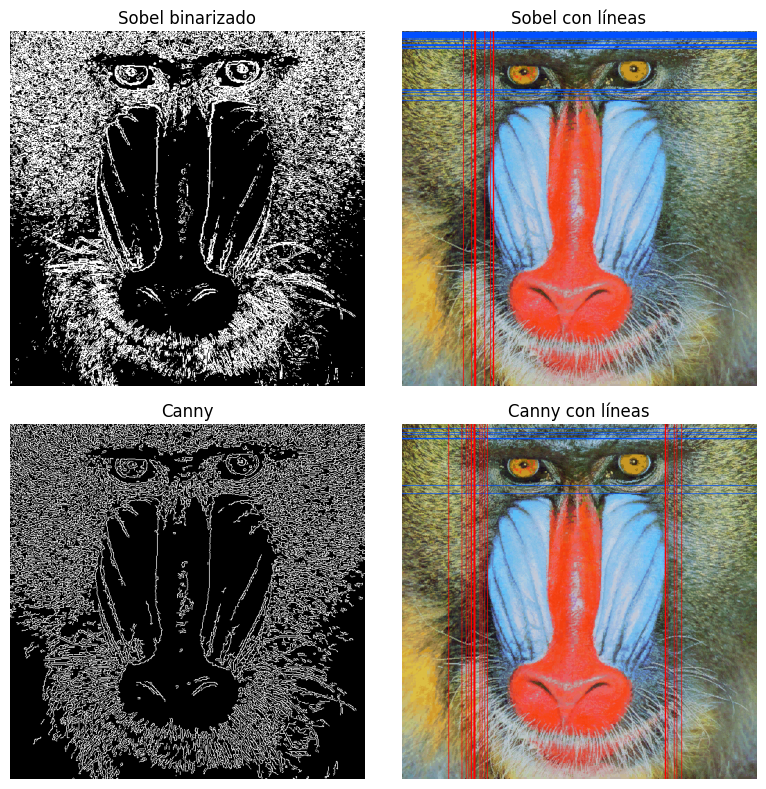

In [9]:
def show_maxs(name, cols, rows):
    print(f"------------ {str(name)} ------------")
    print(f"Valor máximo de filas: {str(rows)}")
    print(f"Valor máximo de columnas: {str(cols)}")

def process_sobel(frame_gray, frame_rgb, show_values=False):
    sobelx = cv2.Sobel(frame_gray, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(frame_gray, cv2.CV_64F, 0, 1)
    sobel_magnitude = cv2.magnitude(sobelx, sobely)
    sobel = cv2.convertScaleAbs(sobel_magnitude)

    _, sobel_bin = cv2.threshold(sobel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    row_counts = cv2.reduce(sobel_bin, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)[:, 0] // 255
    col_counts = cv2.reduce(sobel_bin, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)[0] // 255
    max_rows = np.max(row_counts)
    max_cols = np.max(col_counts)

    if show_values:
        show_maxs("Sobel", max_cols, max_rows)

    rows_selected = np.where(row_counts >= 0.9 * max_rows)[0]
    cols_selected = np.where(col_counts >= 0.9 * max_cols)[0]

    marked = frame_rgb.copy()
    for r in rows_selected:
        cv2.line(marked, (0, r), (marked.shape[1], r), (0, 80, 255), 1)
    for c in cols_selected:
        cv2.line(marked, (c, 0), (c, marked.shape[0]), (255, 0, 0), 1)

    return marked, sobel_bin

def process_canny(frame_gray, frame_rgb, show_values=False):
    canny = cv2.Canny(frame_gray, 100, 200)

    row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)[:, 0] // 255
    col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)[0] // 255
    max_rows = np.max(row_counts)
    max_cols = np.max(col_counts)

    if show_values:
        show_maxs("Canny", max_cols, max_rows)

    rows_selected = np.where(row_counts >= 0.9 * max_rows)[0]
    cols_selected = np.where(col_counts >= 0.9 * max_cols)[0]

    marked = frame_rgb.copy()
    for r in rows_selected:
        cv2.line(marked, (0, r), (marked.shape[1], r), (0, 80, 255), 1)
    for c in cols_selected:
        cv2.line(marked, (c, 0), (c, marked.shape[0]), (255, 0, 0), 1)

    return marked, canny

image_rgb = cv2.cvtColor(cv2.imread("Resources/mandril.jpg"), cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

sobel_marked, sobel_bin = process_sobel(gray_img, image_rgb, show_values=True)
print()
canny_marked, canny = process_canny(gray_img, image_rgb, show_values=True)

plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
plt.title("Sobel binarizado")
plt.axis("off")
plt.imshow(sobel_bin, cmap="gray")

plt.subplot(2,2,2)
plt.title("Sobel con líneas")
plt.axis("off")
plt.imshow(sobel_marked)

plt.subplot(2,2,3)
plt.title("Canny")
plt.axis("off")
plt.imshow(canny, cmap="gray")

plt.subplot(2,2,4)
plt.title("Canny con líneas")
plt.axis("off")
plt.imshow(canny_marked)

plt.tight_layout()
plt.show()


## Modos de captura por WebCam

En esta tarea se propone un demostrador de los modos de detección de bordes aplicados en la tarea anterior, en este caso, se va a aplicar en las imágenes recogidas a través de la WebCam. Adicionalmente, se han aplicado diferentes modos de imagen adicionales. Los modos de imagen implementados son:

- **"o", original:** Es el modo de imagen por defecto que le entra a la WebCam.

- **"e", espejo:** Le da la vuelta a la imagen en el eje X, mostrando así la visión real que tiene una persona sobre la imagen.

- **"g", gris:** La imagen original que recibe como entrada la WebCam se pone en escala de grises.

- **"c", canny:** Convierte la imagen de entrada en una escala de blancos y grises para depsués de umbralizarla mostrar únicamente los bordes detectados.

- **"y", canny filas y columnas:** Usando el método para la obtención de las filas y columnas de modo canny creado para la tarea anterior, se aplica pero a la imagen de entrada de la WebCam.

- **"s", sobel:** Convierte la imagen de entrada en una escala de blancos y grises para después de umbralizarla mostrar únicamente los bordes detectados.

- **"x", sobel filas y columnas:** Usando el método para la obtención de filas y columnas de modo sobel creado para la tarea anterior, se aplica pero a la imagen de entrada de la WebCam.

- **"f", substracción de fondo:** Usando una cámara fija se construye un fondo sin demasiado movimiento y en cada iteración de la captura de fotogramas se compara si un pixel ha cambiado de estado y lo pone en blanco.

Para cambiar los modos de visualización, se ha de pulsar por teclado las teclas mecionadas en el menú de opciones que se printea al ejecutar el script inferior.

In [10]:
vid = cv2.VideoCapture(0)

eliminadorFondo = cv2.createBackgroundSubtractorMOG2(
    history=100, varThreshold=50, detectShadows=True)

def show_controls():
    print("----------- Controles -----------")
    print("o - Original")
    print("e - Espejo")
    print("g - Gris")
    print("c - Canny")
    print("y - Canny filas y columnas")
    print("s - Sobel")
    print("x - Sobel filas y columnas")
    print("f - Sustracción de fondo")
    print("ESC - Salir")

show_controls()

modo = "original"
while True:
    ret, frame = vid.read()
    if not ret:
        break

    if modo == "original":
        salida = frame

    elif modo == "espejo":
        salida = cv2.flip(frame, 1)

    elif modo == "gris":
        salida = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        salida = cv2.cvtColor(salida, cv2.COLOR_GRAY2BGR)

    elif modo == "canny":
        gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gris, 100, 200)
        salida = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    elif modo == "canny filas y columnas":
        marcado, _ = process_sobel(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY), frame)
        salida = marcado

    elif modo == "sobel":
        gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        sobelx = cv2.Sobel(gris, cv2.CV_64F, 1, 0)
        sobely = cv2.Sobel(gris, cv2.CV_64F, 0, 1)
        sobel_mag = cv2.magnitude(sobelx, sobely)
        sobel = cv2.convertScaleAbs(sobel_mag)
        salida = cv2.cvtColor(sobel, cv2.COLOR_GRAY2BGR)
    
    elif modo == "sobel filas y columnas":
        marcado, _ = process_canny(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY), frame)
        salida = marcado

    elif modo == "fondo":
        salida = eliminadorFondo.apply(frame)
        salida = cv2.cvtColor(salida, cv2.COLOR_GRAY2BGR)

    else:
        salida = frame

    cv2.imshow("Demostrador Webcam", salida)

    key = cv2.waitKey(20) & 0xFF
    if key == 27:
        break
    elif key == ord("o"):
        modo = "original"
    elif key == ord("e"):
        modo = "espejo"
    elif key == ord("g"):
        modo = "gris"
    elif key == ord("c"):
        modo = "canny"
    elif key == ord("s"):
        modo = "sobel"
    elif key == ord("f"):
        modo = "fondo"
    elif key == ord("y"):
        modo = "canny filas y columnas"
    elif key == ord("x"):
        modo = "sobel filas y columnas"

vid.release()
cv2.destroyAllWindows()


----------- Controles -----------
o - Original
e - Espejo
g - Gris
c - Canny
y - Canny filas y columnas
s - Sobel
x - Sobel filas y columnas
f - Sustracción de fondo
ESC - Salir


## A elegir 

TAREA: Tras ver los vídeos My little piece of privacy, Messa di voce y Virtual air guitar proponer un demostrador reinterpretando la parte de procesamiento de la imagen, tomando como punto de partida alguna de dichas instalaciones.

## Fuentes y Documentación

- **Internet:** Se ha utilizado internet para la búsqueda de información relativa al funcionamiento de la estrategia de **[Sobel](https://scispace.com/pdf/edge-detection-by-modified-otsu-method-167ccq2st7.pdf)**, aplicando también el **[Otsu](https://learnopencv.com/otsu-thresholding-with-opencv/)** y de la estrategia de **[Canny](https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html)**.

- **Inteligencia Artificial Generativa (ChatGPT):** Se ha utilizado la IA generativa para refactorizar el código de la [tarea 2](#umbralizado-de-imagen-a-8-bits) para convertirlo en una función con el objetivo de poder implementarla de manera simple como un modo adicional en la [tarea 3](#modos-de-captura-por-webcam).

- **Enlaces:**
    - PONER

Para más documentación referente a las tareas, véase el [README](./README.md) asociado a la carpeta de la práctica en cuestión **(VC_P2)**.